In [1]:
import extFunc as ext
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import numpy as np
from importlib import import_module
import pandas as pd 
import cobra
import optlang
import copy 
import random

In [2]:
#Load Models if not already in RAM

#nameList = ['iJN1462_GLC_UR10_9.xml' , 'iJN1462_GLC_UR6_3.xml', 'iJN1462_GLN_UR5_1.xml', 'iJN1462_GLC_UR7_3.xml' , 'iJN1462_OCT_UR3_4.xml']
#nameList = ['iJN1462_GLC_UR6_3.xml' , 'iJN1462_OCT_UR3_4.xml']
nameList = ['iJN1462_OCT_UR3_4.xml']

if 'modelDict' not in locals():
    modelDict = ext.ImportFunction(nameList)



if 'glc_oct_comp'  not in locals():
    glc_oct_comp = ext.ModelComparison(modelDict=modelDict)


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [3]:
#Base case as in Nogales Paper
model           = modelDict['iJN1462_OCT_UR3_4']
model_bounded   = copy.deepcopy(model)

fv                  = cobra.flux_analysis.flux_variability_analysis(model)
fv["cumulative"]    = abs(fv.maximum) + abs(fv.minimum)


173


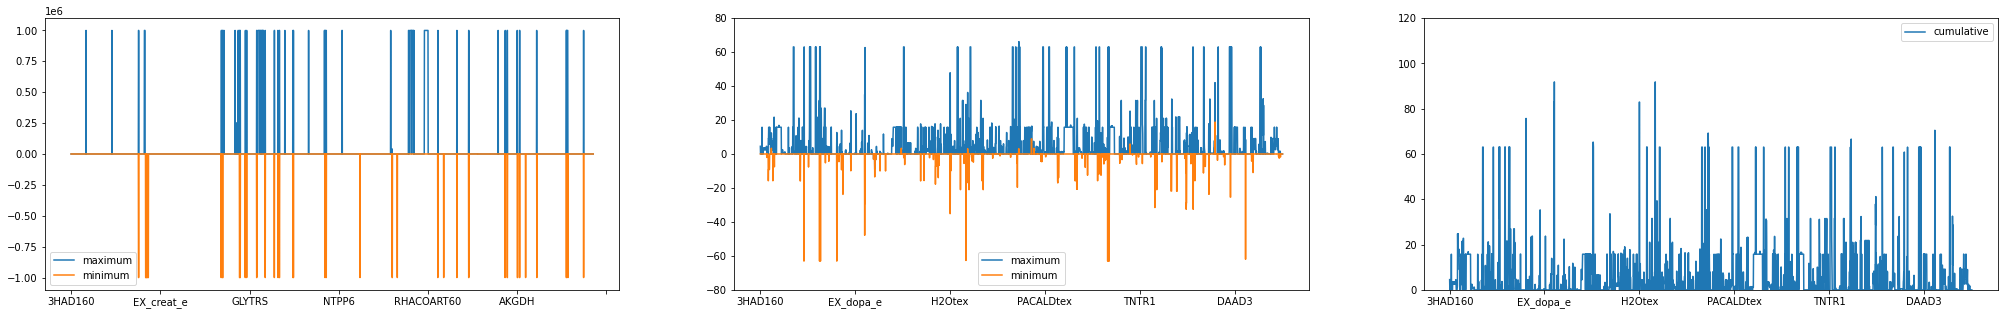

In [4]:
filterV = 200
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(35,5))
fv.plot( y=["maximum", "minimum"],ax=axes[0])
fv[(abs(fv.maximum)<filterV) & (abs(fv.minimum)<filterV)].plot( y=["maximum", "minimum"],ax=axes[1],ylim=[-80,80])
fv[(abs(fv.maximum)<filterV) & (abs(fv.minimum)<filterV)].plot( y=["cumulative"],ax=axes[2],ylim=[0,120])

## save list of filtered for later

list_of_filtered = fv[(abs(fv.maximum)>filterV) | (abs(fv.minimum)>filterV)]
print(len(list_of_filtered))


Assumption through high default boundaries overal variability artificially strethed ?
Test, Measure the overall cumulative variability for the bounded and unbound optimized cases.
If a difference is visible after removig the artificially stretched reactions, this would mean that theire was an influence

In [5]:

bounded_model = copy.deepcopy(model)

for reaction in bounded_model.reactions:
    if abs(reaction.lower_bound)>50:
        reaction.lower_bound= -50
    if abs(reaction.upper_bound)>50:
        reaction.upper_bound=50
        
fv_new_model  = cobra.flux_analysis.flux_variability_analysis(bounded_model)
fv_new_model["cumulative"]    = abs(fv_new_model.maximum) + abs(fv_new_model.minimum)

<AxesSubplot:>

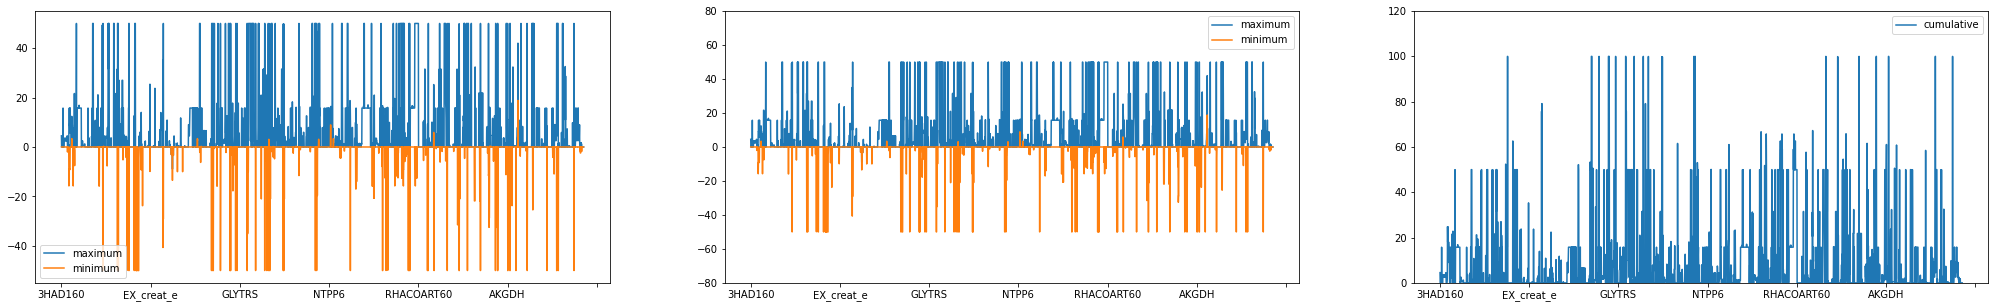

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fv_new_model.plot( y=["maximum", "minimum"],ax=axes[0],figsize=(35,5))
fv_new_model[(abs(fv_new_model.maximum)<200)&(abs(fv_new_model.minimum)<200)].plot( y=["maximum", "minimum"],ax=axes[1],ylim=[-80,80])
fv_new_model.plot( y=["cumulative"],ax=axes[2],ylim=[0,120])


Assumption through high default boundaries overal variability artificially strethed ?
Test, Measure the overall cumulative variability for the bounded and unbound optimized cases.
If a difference is visible after removig the artificially stretched reactions, this would mean that theire was an influence

<AxesSubplot:>

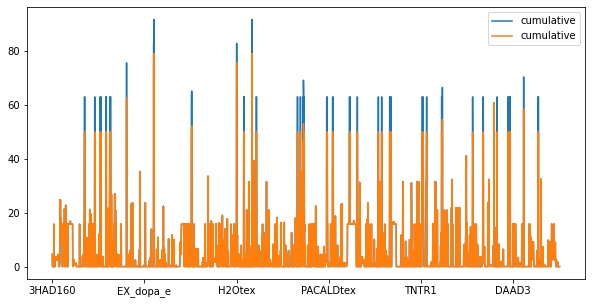

In [15]:
filter = list_of_filtered.index

ax1 =   fv[~fv.index.isin(filter)].plot( y=["cumulative"],ylim=[0,120]                )
fv_new_model[~fv_new_model.index.isin(filter)].plot( y=["cumulative"],ax=ax1)

AttributeError: 'Series' object has no attribute 'nonzero'

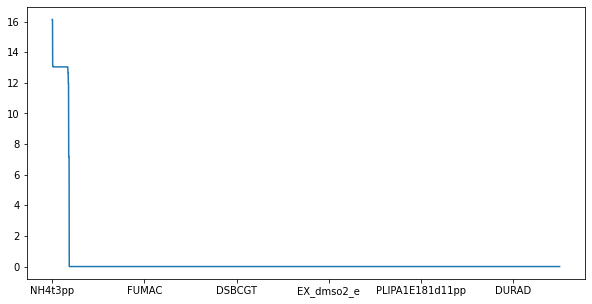

In [57]:
diff=fv[~fv.index.isin(filter)]["cumulative"] - fv_new_model[~fv_new_model.index.isin(filter)]["cumulative"]
diff.sort_values(ascending=False).plot()
#print(len(diff.nonzero()))




